In [5]:
from google.colab import files
import pandas as pd

# Upload file from local system
uploaded = files.upload()

Saving Transactions.csv to Transactions.csv
Saving Customers.csv to Customers.csv
Saving Products.csv to Products.csv


In [43]:
# Load each CSV file into a pandas dataframe
transactions_df = pd.read_csv('/content/Transactions.csv')
customers_df = pd.read_csv('/content/Customers.csv')
products_df = pd.read_csv('/content/Products.csv')


In [44]:
# Displaying the first few rows of each dataframe
print("Transactions DataFrame:")
print(transactions_df.head())

print("\nCustomers DataFrame:")
print(customers_df.head())

print("\nProducts DataFrame:")
print(products_df.head())

Transactions DataFrame:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  

Customers DataFrame:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products DataFrame:
  

In [45]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA

In [49]:
# Load datasets
transactions_df = pd.read_csv('/content/Transactions.csv')
customers_df = pd.read_csv('/content/Customers.csv')

In [50]:
# Inspect the datasets for available columns
transactions_columns = transactions_df.columns.tolist()
customers_columns = customers_df.columns.tolist()

In [51]:
transactions_columns, customers_columns

(['TransactionID',
  'CustomerID',
  'ProductID',
  'TransactionDate',
  'Quantity',
  'TotalValue',
  'Price'],
 ['CustomerID', 'CustomerName', 'Region', 'SignupDate'])

In [52]:
import pandas as pd

# Load datasets from the provided file paths
transactions_df = pd.read_csv('/content/Transactions.csv')
customers_df = pd.read_csv('/content/Customers.csv')

# Display column names
print("Transactions Columns:", transactions_df.columns.tolist())
print("Customers Columns:", customers_df.columns.tolist())


Transactions Columns: ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price']
Customers Columns: ['CustomerID', 'CustomerName', 'Region', 'SignupDate']


In [53]:
# Merge datasets on CustomerID
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')

In [54]:
# Converting SignupDate to datetime and calculating days since signup
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])
merged_df['DaysSinceSignup'] = (pd.Timestamp.now() - merged_df['SignupDate']).dt.days


In [55]:
# One-hot encoding for converting categorical value to numerical ones, the categorical column 'Region'
merged_df = pd.get_dummies(merged_df, columns=['Region'], drop_first=True)

In [56]:
clustering_features = merged_df[['TotalValue', 'Quantity', 'Price', 'DaysSinceSignup']]


In [57]:
# Fill missing values if any exists
clustering_features.fillna(clustering_features.mean(), inplace=True)

<ipython-input-57-d87a69869bd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_features.fillna(clustering_features.mean(), inplace=True)


In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score


In [59]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

In [60]:
# Applying KMeans clustering, here I took k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)



In [61]:
# AddING cluster labels to DataFrame
merged_df['Cluster'] = clusters


In [62]:
# Now we will evaluate clustering using DB Index
db_index = davies_bouldin_score(scaled_features, clusters)
print("DB Index:", db_index)


DB Index: 1.3767781059224495


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

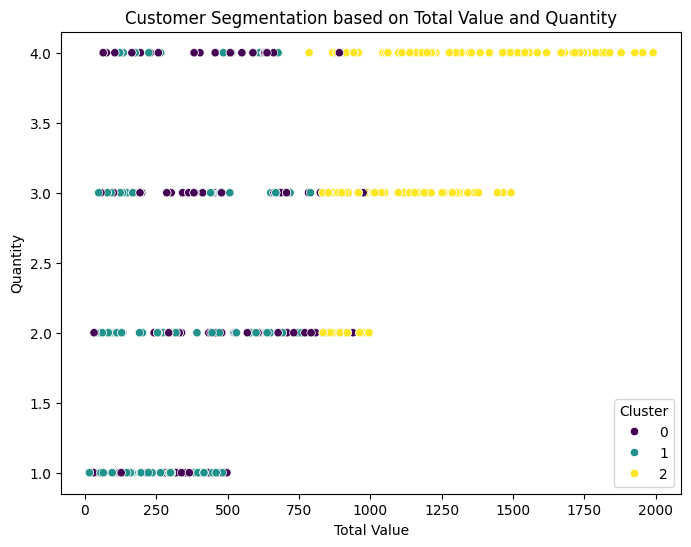

In [64]:
#Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=merged_df['TotalValue'], y=merged_df['Quantity'], hue=merged_df['Cluster'], palette='viridis')
plt.title('Customer Segmentation based on Total Value and Quantity')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()